In [48]:
import numpy as np # only need this once per program

file_name = 'sample-data.csv'               # replace with the name of your csv data file

file_folder = 'data/'                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name

f_gen, amp_gen, amp_R, amp_L, amp_C  = np.loadtxt(data_file, delimiter = ';', skiprows = 1, usecols = (0, 1, 2,3,4), unpack = True)

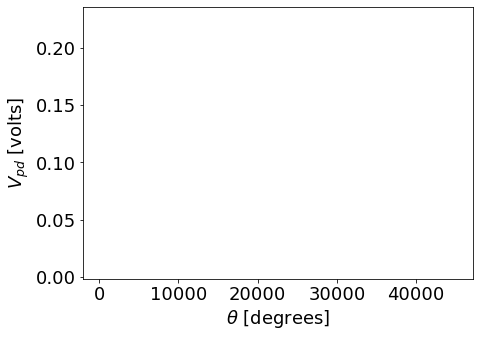

In [49]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt #this is the traditional method

mpl.rc('xtick', labelsize = 18)      #use 18 point font for numbering on x axis
mpl.rc('ytick', labelsize = 18)      #use 18 point font for numbering on y axis

plt.figure(figsize = (7,5))          #specify figure size as 7 x 5 inches
#for default size, type plt.figure()

plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [volts]", fontsize = 18)   #use 18 point font for label text

plt.errorbar(f_gen, amp_R,
             xerr=None, yerr=None,
             linestyle = 'none',
             color = 'blue',
             capsize = 3, capthick = 1)

plt.show()